# Практическая №4

Задачи на смеси и системы резервуаров  
Вариант 9

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1  
Задача на смеси


In [9]:
def c(t):
    return 20*(1 + np.cos(t)/2)

def euler_cauchy(T0, T, N):
    t = np.linspace(T0, T, N)
    tau = t[1] - t[0]

    res = np.zeros((2, N))
    res[0, :] = t         # Моменты времени
    res[1, 0] = 0         # Начальное значение

    V = 2_000_000
    x_prev = 0
    t_ = -1

    for i in range(1, N):
        x_pred = x_prev + tau * 200_000 * (c(t[i]) - x_prev) / V

        f_pred = 200_000 * (c(t[i]) - x_pred) / V
        f_prev = 200_000 * (c(t[i]) - x_prev) / V

        x = x_prev + tau * 0.5 * (f_prev + f_pred)

        res[1, i] = x
        x_prev = x

        if x >= 5 and t_ == -1:
            t_ = t[i]

    return res, t_

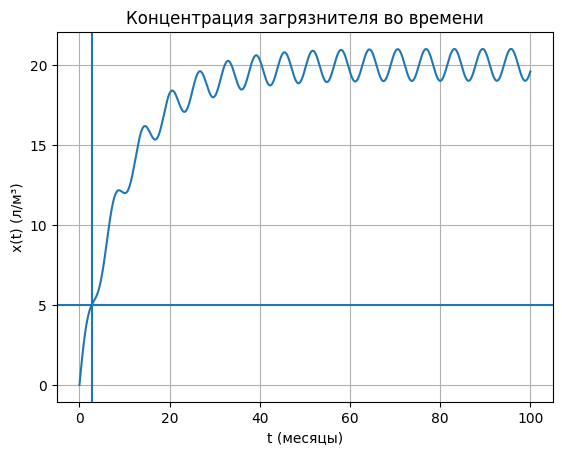

Время достижения концентрации 5 л/м³: 2.72 месяцев


In [19]:
res, t5 = euler_cauchy(0, 100, 100000)
t, x = res

plt.figure()
plt.plot(t, x)
plt.axhline(5)
plt.axvline(t5)
plt.xlabel('t (месяцы)')
plt.ylabel('x(t) (л/м³)')
plt.title('Концентрация загрязнителя во времени')
plt.grid(True)
plt.show()

print(f"Время достижения концентрации 5 л/м³: {t5:.3} месяцев")

# Задание 2
Каскад резервуаров

In [35]:
def f(m_in, m_out, v_in, v_out, r):
    return m_in*r/v_in - m_out*r/v_out

def euler_cauchy_system(T0, T, N, x10, x20, x30):
    t = np.linspace(T0, T, N)
    tau = t[1] - t[0]

    res = np.zeros((4, N))
    res[0] = t
    res[1, 0] = x10
    res[2, 0] = x20
    res[3, 0] = x30

    r = 20
    v1, v2, v3 = 150, 125, 150
    x1_prev = x10
    x2_prev = x20
    x3_prev = x30
    for i in range(1, N):
        f1_prev = f(x3_prev, x1_prev, v3, v1, r)
        f2_prev = f(x1_prev, x2_prev, v1, v2, r)
        f3_prev = f(x2_prev, x3_prev, v2, v3, r)

        x1_pred = x1_prev + tau * f1_prev
        x2_pred = x2_prev + tau * f2_prev
        x3_pred = x3_prev + tau * f3_prev

        f1_pred = f(x3_pred, x1_pred, v3, v1, r)
        f2_pred = f(x1_pred, x2_pred, v1, v2, r)
        f3_pred = f(x2_pred, x3_pred, v2, v3, r)

        x1 = x1_prev + tau * 0.5 * (f1_prev + f1_pred)
        x2 = x2_prev + tau * 0.5 * (f2_prev + f2_pred)
        x3 = x3_prev + tau * 0.5 * (f3_prev + f3_pred)

        res[1, i] = x1
        res[2, i] = x2
        res[3, i] = x3

        x1_prev, x2_prev, x3_prev = x1, x2, x3

    return res

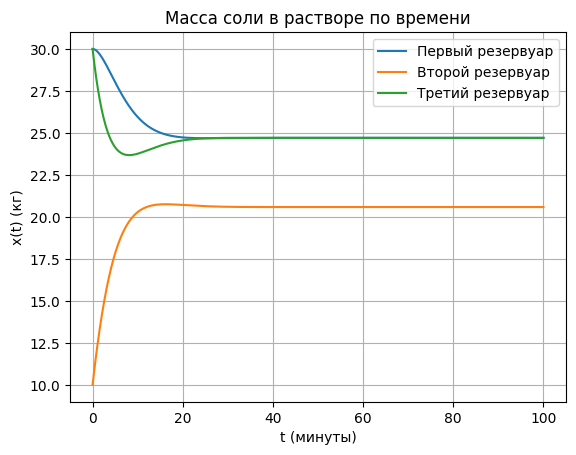

Максимальная масса во втором резервуре: t=16.216216216216218, x(t)=20.75440776380369


In [38]:
t, x1, x2, x3 = euler_cauchy_system(0, 100, 1000, 30, 10, 30)

i_max = np.argmax(x2)
t_max, x2_max = t[i_max], x2[i_max]

plt.figure()
plt.plot(t, x1, label="Первый резервуар")
plt.plot(t, x2, label="Второй резервуар")
plt.plot(t, x3, label="Третий резервуар")
plt.xlabel('t (минуты)')
plt.ylabel('x(t) (кг)')
plt.title('Масса соли в растворе по времени')
plt.grid(True)
plt.legend()
plt.show()

print(f"Максимальная масса во втором резервуре: t={t_max}, x(t)={x2_max}")

# Задание 3
Закон Торричелли


$\frac{dV}{dt}=-s\sqrt{2gy(t)}$  
$V=Sy(t), S(t)=\pi R^2$  
$\frac{dy}{dt}=-\frac{r^2}{R^2}\sqrt{2gy}dt$  
$\sqrt{y}=\sqrt{H}-\frac{r^2}{2R^2}\sqrt{2g}t$  
$y(t)=(\sqrt{H}-\frac{r^2\sqrt{2g}}{2R^2}t)^2$  
$t={2R^2}\frac{\sqrt{H}-\sqrt{y(t)}}{r^2\sqrt{2g}}$




In [64]:
def y(t, R, H, r, g=9.81):
    val = np.sqrt(H) - (r**2)/(2*R**2) * np.sqrt(2*g)*t
    return val ** 2

In [69]:
def f(y, R, r, g=9.81):
    return -(r/R)**2 * np.sqrt(2*g*y)

def euler_cauchy(T0, T, N, R, H, r):
    t = np.linspace(T0, T, N)
    tau = t[1] - t[0]

    res = np.zeros((2, N))
    res[0, :] = t         # Моменты времени
    res[1, 0] = H         # Начальное значение

    y_prev = H

    for i in range(1, N):
        f_prev = f(y_prev, R, r)
        y_pred = max(0, y_prev + tau * f_prev)

        f_pred = f(y_pred, R, r)

        y = y_prev + tau * 0.5 * (f_prev + f_pred)

        res[1, i] = y
        y_prev = y

        if y <= 0:
            res = res[:, :i+1]
            break

    return res

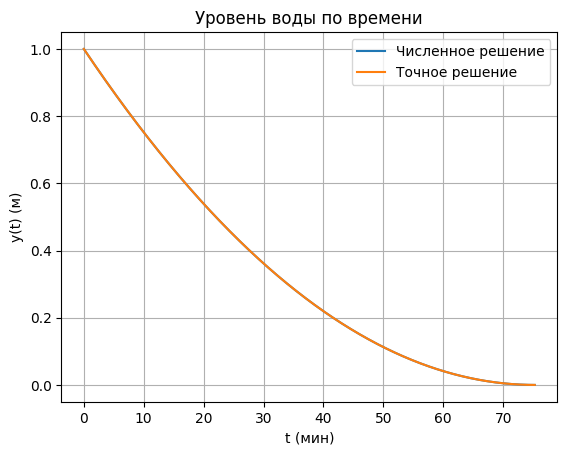

In [70]:
R = 1
H = 1
r = 0.01
T0 = 0
T = 5000
N = 5000

t, y_ = euler_cauchy(T0, T, N, R, H, r)
y_exact = y(t, R, H, r)

plt.figure()
plt.plot(t/60, y_, label='Численное решение')
plt.plot(t/60, y_exact, label='Точное решение')
plt.xlabel('t (мин)')
plt.ylabel('y(t) (м)')
plt.title('Уровень воды по времени')
plt.grid(True)
plt.legend()
plt.show()

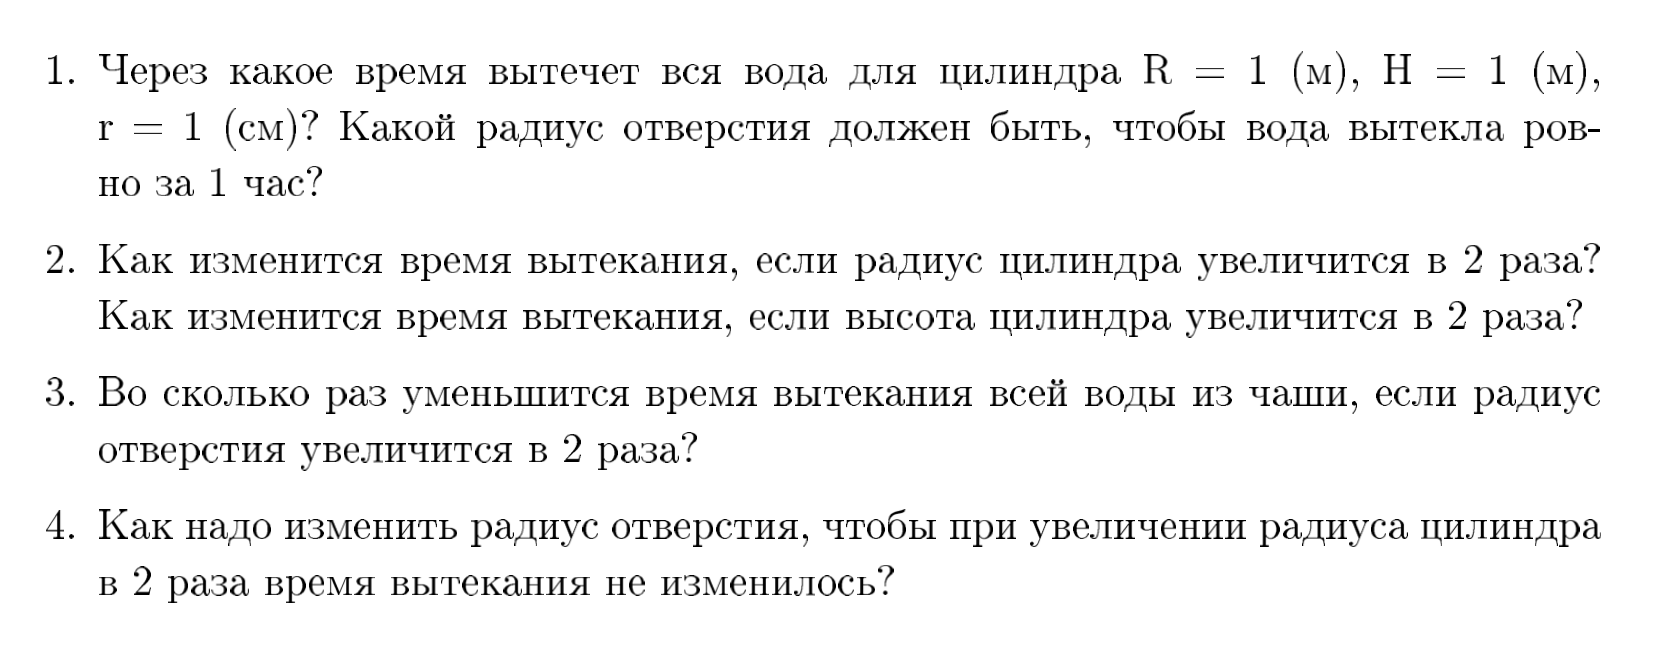

1  
$t={2R^2}\frac{\sqrt{H}-\sqrt{y(t)}}{r^2\sqrt{2g}}$  
$3600={2}\frac{1}{r^2\sqrt{2g}}$  
$r=\sqrt{\frac{1}{1800\sqrt{2g}}}=0.0112м=1.12см$


2.1  
$t={2*4*R^2}\frac{\sqrt{H}-\sqrt{y(t)}}{r^2\sqrt{2g}}$  
Увеличится в 4 раза  
2.2  
$t={2R^2}\frac{\sqrt{2H}-\sqrt{2y(t)}}{r^2\sqrt{2g}}$  
$\text{Увеличится в }\sqrt{2}\text{ раза}$

3  
$t={2R^2}\frac{\sqrt{H}-\sqrt{y(t)}}{4r^2\sqrt{2g}}$  
Уменьшится в 4 раза

4  
Тоже удвоить